### Distribución Binomial

La distribución binomial es una distribución de probabilidad discreta que describe el número de éxitos en una secuencia de n ensayos independientes entre sí, con una probabilidad fija p de ocurrencia del éxito entre los ensayos.

La función de probabilidad de la distribución binomial es:

$$P(X = k) = \binom{n}{k} p^k (1-p)^{n-k}$$

Donde:

- $n$ es el número total de ensayos.
- $k$ es el número de éxitos.
- $p$ es la probabilidad de éxito en un solo ensayo.
- $1-p$ es la probabilidad de fracaso en un solo ensayo.

La función de distribución acumulada de la distribución binomial es:

$$P(X \leq k) = \sum_{i=0}^{k} \binom{n}{i} p^i (1-p)^{n-i}$$


### Truncamiento de la Distribución Binomial

#### 1. Valores Absolutos
Se limita la distribución exponencial a un rango de valores especificos [a,b]. La función de densidad de probabilidad de la distribución truncada exponencial es:

$$P(X = k) = \frac{P(X = k)}{P(a \leq X \leq b)}$$

Donde:
- $a$ es el valor inferior.
- $b$ es el valor superior.



#### 2. Desviación Estándar
Se limita la distribución exponencial a un rango de valores que se encuentran dentro de un número de desviaciones estándar de la media. La función de densidad de probabilidad de la distribución truncada exponencial es:

$$P(X = k) = \frac{P(X = k)}{P(\mu - z\sigma \leq X \leq \mu + z\sigma)}$$

Donde:

- $\mu$ es la media de la distribución.
- $\sigma$ es la desviación estándar de la distribución.
- $z$ es el número de desviaciones estándar de la media.


#### 3. Percentiles
Se limita la distribución exponencial a un rango de valores que se encuentran dentro de un rango de percentiles. La función de densidad de probabilidad de la distribución truncada exponencial es:

$$P(X = k) = \frac{P(X = k)}{P(X \leq p_2) - P(X \leq p_1)}$$

Donde:

- $p_1$ es el percentil inferior.
- $p_2$ es el percentil superior.





##### Librerias Necesarias

In [ ]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
from scipy.stats import rv_discrete

##### Parametros y Distribución Binomial

In [1]:
# Parámetros de la distribución original
n, p = 10, 0.5

# Valores posibles y sus probabilidades
x = np.arange(0, n+1)
pmf_values = stats.binom.pmf(x, n, p)

# Graficar la distribución original
plt.hist(x, bins=n+1, weights=pmf_values, color='blue', alpha=0.5, edgecolor='black', linewidth=1.2)
plt.title('Distribución Binomial')
plt.xlabel('Valores')
plt.ylabel('Probabilidad')
plt.show()


NameError: name 'np' is not defined

#### 1. Valores Absolutos

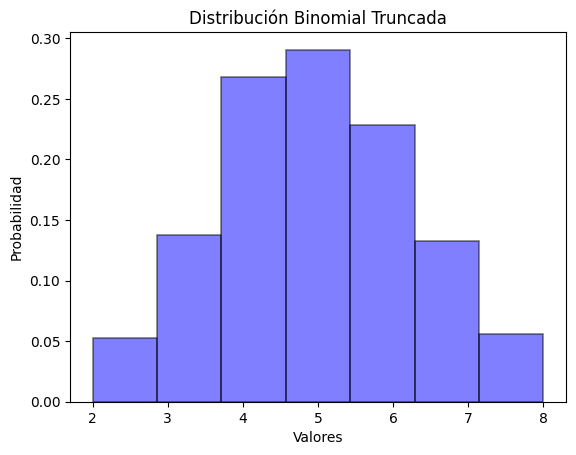

In [ ]:
a,b = 2,8

x_truncated = x[(x >= a) & (x <= b)]
pmf_truncated = pmf_values[(x >= a) & (x <= b)]

# Normalizar la distribución para que la suma sea 1
pmf_truncated /= pmf_truncated.sum()

# Crear la nueva distribución truncada
truncated_binom = rv_discrete(name="trunc_binom", values=(x_truncated, pmf_truncated))

# Muestrear datos
samples = truncated_binom.rvs(size=1000)

# Graficar la distribución truncada

plt.hist(samples, bins=b-a+1, density=True, color='blue', alpha=0.5, edgecolor='black', linewidth=1.2)
plt.title('Distribución Binomial Truncada')
plt.xlabel('Valores')
plt.ylabel('Probabilidad')
plt.show()



#### 2. Desviación Estándar

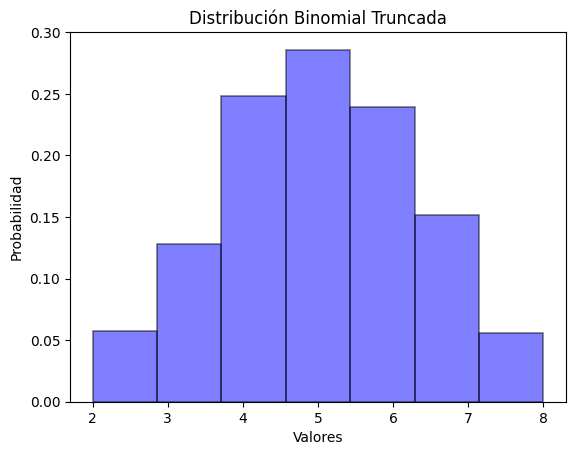

In [ ]:
n, p = 10, 0.5
mu = n * p
sigma = np.sqrt(n * p * (1 - p))

# Definir el truncamiento a ±2σ
k = 2
a, b = int(np.floor(mu - k * sigma)), int(np.ceil(mu + k * sigma))

# Truncar la PMF
x_truncated = x[(x >= a) & (x <= b)]
pmf_truncated = pmf_values[(x >= a) & (x <= b)]
pmf_truncated /= pmf_truncated.sum()  # Normalizar

# Crear la distribución truncada
truncated_binom = rv_discrete(name="trunc_binom", values=(x_truncated, pmf_truncated))

#Graficar la distribución truncada
samples = truncated_binom.rvs(size=1000)

plt.hist(samples, bins=b-a+1, density=True, color='blue', alpha=0.5, edgecolor='black', linewidth=1.2)
plt.title('Distribución Binomial Truncada')
plt.xlabel('Valores')
plt.ylabel('Probabilidad')
plt.show()



##### 3. Percentiles

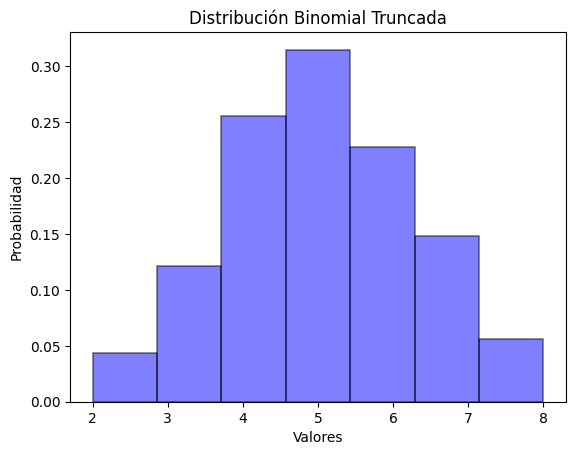

In [ ]:
# Definir los percentiles de truncamiento
p_lower, p_upper = 0.05, 0.95

# Calcular los valores de corte usando percentiles
a = int(stats.binom.ppf(p_lower, n, p))
b = int(stats.binom.ppf(p_upper, n, p))

# Truncar la PMF
x_truncated = x[(x >= a) & (x <= b)]
pmf_truncated = pmf_values[(x >= a) & (x <= b)]
pmf_truncated /= pmf_truncated.sum()  # Normalizar

# Crear la distribución truncada
truncated_binom = rv_discrete(name="trunc_binom", values=(x_truncated, pmf_truncated))

# Graficar la distribución truncada
samples = truncated_binom.rvs(size=1000)

plt.hist(samples, bins=b-a+1, density=True, color='blue', alpha=0.5, edgecolor='black', linewidth=1.2)
plt.title('Distribución Binomial Truncada')
plt.xlabel('Valores')
plt.ylabel('Probabilidad')
plt.show()

